# Instagram Follower Analysis
> Contributer : edwardstephendrood@gmail.com, developer.pawandeep@gmail.com

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
os.chdir('/home/sadil/Python Codes')

In [3]:
data=pd.read_csv("train_cleaned.csv", delimiter=",")

In [4]:
data.head()

,followers,followings,interest,labels,posts,user
0,851.0,5215.0,💠Bong Girl💣💥 🔸Zero's Queen 👸 💠 Chocolate lover...,0.0,159.0,_love_q_u_e_e_n__
1,289.0,480.0,"Rather than being anti-social, I prefer being ...",0.0,235.0,c_h_a_n_d_r_e_y_e_e
2,76.0,316.0,18 y/o Student Kolkatan Focused • Blessed • Li...,0.0,20.0,aesthetic._x_.trash
3,183.0,3727.0,❝SILENCE IS WHERE WE TRULY FALL IN LOVE❞ ...,0.0,232.0,i.t.a.m.a.e
4,151.0,747.0,"""Of coffees and cigarettes"" :)",0.0,281.0,s__r__e__e__j__i__t__a


# Pre-Processing Dataset
> Contributer: developer.pawandeep@gmail.com

In [5]:
#There are many inf values in followings,followers columns
for x in range(len(data['followings'])):
    #print(type(x))
    if data['followings'][x] == float('inf'):
        data['followings'][x] =np.random.randint(1e+6,1e+7)

/home/sadil/anaconda3/envs/ml_env/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [6]:
# Some Users have 0 Posts,followers,followings and we will divide follwers/followings
data['followings'] = data['followings'].astype(int)
data['followers'] =data['followers'].astype(int)

data['posts']=data['posts'].replace({0:2,1:2})
data['followers']=data['followers'].replace({0:2,1:2})
data['followings']=data['followings'].replace({0:2,1:2})

# Transformation
> Contributer: developer.pawandeep@gmail.com,edwardstephendrood@gmail.com

In [7]:
data['followings']=data['followers']/data['followings']

data.drop('followers',axis=1,inplace=True)

data.isnull().sum()

followings      0
interest      980
labels          2
posts           0
user            0
dtype: int64

In [8]:
data.drop('labels',axis=1,inplace=True)
data.drop('interest',axis=1,inplace=True)

In [9]:
data.describe()

,followings,posts
count,1.173000e+03,1173.000000
mean,1.398927e+00,396.123615
std,3.496949e+00,1354.464431
min,2.282232e-07,2.000000
25%,1.057065e-01,27.000000
50%,6.578947e-01,118.000000
75%,1.425170e+00,328.000000
max,7.000000e+01,34891.000000


In [10]:
y=data["user"]

In [11]:
data.drop('user',axis=1,inplace=True)

# Removing Skewness

In [12]:
data['posts']=np.log(data['posts'])
#data['followers']=np.log(data['followers'])
data['followings']=np.log(data['followings'])

# Standard Scaling

In [13]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
# 4.2 Use ot now to 'fit' &  'transform'
data=ss.fit_transform(data)

# Finding Optimum No of Clusters
> Contributer: developer.pawandeep@gmail.com

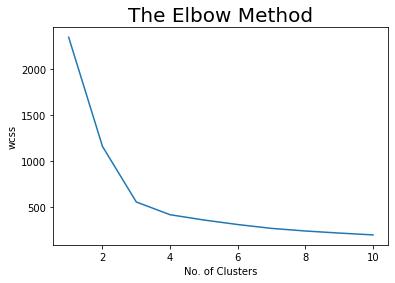

In [14]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 100, n_init = 10, random_state = 0)
    km.fit(data)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

In [15]:
cluster=KMeans(n_clusters=3)
cluster.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [16]:
pd.Series(cluster.predict(data)).value_counts()

0    651
2    341
1    181
dtype: int64

# Visualization
> Contributer: edwardstephendrood@gmail.com

In [18]:
center

array([[ 0.36276003,  0.38588303],
       [-2.12721918,  0.99164563],
       [ 0.43656859, -1.26304314]])

In [17]:
x=data
y_means=cluster.predict(x)
center=cluster.cluster_centers_

Text(0.5, 1.0, 'Posts Vs Followings')

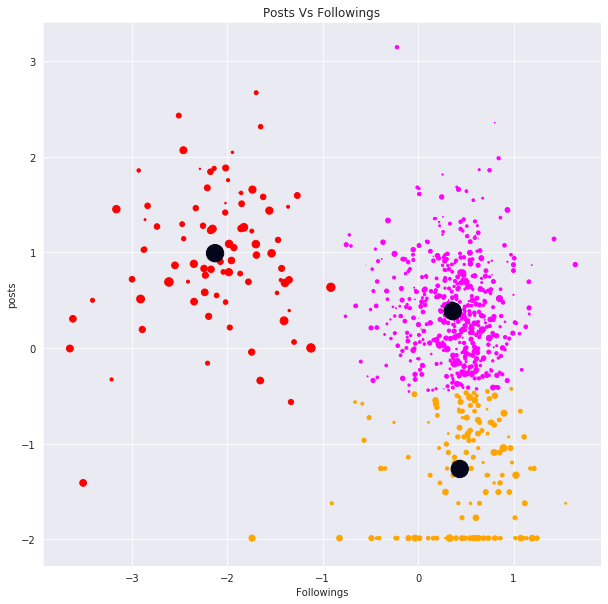

In [33]:
import seaborn as sns
sns.set_style("darkgrid")
plt.figure(figsize=(10,10))
plt.scatter(x[y_means==0,0],x[y_means==0,1],s=x[y_means==0]*20,c='magenta')
plt.scatter(x[y_means==1,0],x[y_means==1,1],s=x[y_means==1]*30,c='red')
plt.scatter(x[y_means==2,0],x[y_means==2,1],s=x[y_means==2]*30,c='orange')
plt.scatter(center[:,0],center[:,1],s=300,c=(0,0,0))
plt.xlabel("Followings")
plt.ylabel("posts")
plt.title("Posts Vs Followings")